# FPP optimization workflow 

In [1]:
using Revise
using FUSE
using IMAS
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Debug);

[ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]


## Make new FPP equilibirum from scratch

### Initialize from FPP v1_demount

In [2]:
dd = IMAS.dd()
FUSE.warmup(dd);
FUSE.timer["warmup"]

[ Info: Equilibrium
[ Info:  Solovev
[ Info: HCD
[ Info:  ECsimple
[ Info:  ICsimple
[ Info:  LHsimple
[ Info:  NBsimple
[ Info: SteadyStateCurrent
[ Info: CXbuild
[ Info: WholeFacility
[ Info:  StationaryPlasma
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    LHsimple
[ Info:    NBsimple
[ Info:   Current
[ Info:    SteadyStateCurrent
[ Info:   CoreTransport
[ Info:    FixedProfiles
[ Info:     Pedestal
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    LHsimple
[ Info:    NBsimple
[ Info:   Current
[ Info:    SteadyStateCurrent
[ Info:   Equilibrium
[ Info:    Solovev
┌ Warning: Max number of iterations (1) has been reached with convergence error of [0.102] compared to threshold of 0.05
└ @ FUSE /fusion/ga/projects/ird/ptp/weisbergd/julia/dev/FUSE/src/actors/compound/stationary_plasma_actor.jl:126
[ Info:  StabilityLimits
[ Info:  HFSsizing
[ Info:   FluxSwing
[ Info:   Stresses
[ Info:  LFSsizing
[ Info:  CXbuild
[ Info:  PFcoilsOpt
[ Info:  PassiveStru

 ────────────────────────────────────────────────────────────────────────────────
                                        Time                    Allocations      
                               ───────────────────────   ────────────────────────
       Tot / % measured:             521s /  94.3%           89.8GiB /  94.4%    

 Section               ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────────────────
 init                       1     286s   58.2%    286s   40.5GiB   47.8%  40.5GiB
   init                     1     254s   51.7%    254s   39.1GiB   46.1%  39.1GiB
     init_equilibrium       1     233s   47.5%    233s   35.9GiB   42.4%  35.9GiB
       Equilibrium          1     196s   39.8%    196s   24.4GiB   28.8%  24.4GiB
         Solovev            1     170s   34.5%    170s   20.0GiB   23.6%  20.0GiB
     init_core_sources      1    7.24s    1.5%   7.24s   1.15GiB    1.4%  1.15GiB
       HCD     

In [3]:
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:FPP, version=:v2);

In [4]:
act.ActorHFSsizing.error_on_technology = false
act.ActorHFSsizing.error_on_performance = false

false

## Run WholeFacility Actor

In [5]:
dd = IMAS.dd()
@time FUSE.init(dd, ini, act; do_plot=false);
#mxh_plot = plot(dd.equilibrium)
#display(mxh_plot)

[ Info: Equilibrium
[ Info:  TEQUILA
[ Info: HCD
[ Info:  ECsimple
[ Info:  ICsimple
[ Info:  LHsimple
[ Info:  NBsimple
[ Info: SteadyStateCurrent
[ Info: CXbuild


 65.741486 seconds (113.56 M allocations: 10.304 GiB, 3.74% gc time, 45.41% compilation time: 0% of which was recompilation)


In [6]:
@time FUSE.ActorWholeFacility(dd, act);

[ Info: WholeFacility
[ Info:  StationaryPlasma
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    LHsimple
[ Info:    NBsimple
[ Info:   Current
[ Info:    SteadyStateCurrent
[ Info:   CoreTransport
[ Info:    FixedProfiles
[ Info:     Pedestal
[ Info:   HCD
[ Info:    ECsimple
[ Info:    ICsimple
[ Info:    LHsimple
[ Info:    NBsimple
[ Info:   Current
[ Info:    SteadyStateCurrent
[ Info:   Equilibrium
[ Info:    TEQUILA
[ Info:  StabilityLimits
[ Info:  HFSsizing
[ Info:   FluxSwing
[ Info:   Stresses
[ Info:  LFSsizing
[ Info:  CXbuild
[ Info:  PFcoilsOpt
[ Info:  PassiveStructures
[ Info:  Neutronics
[ Info:  Blanket
[ Info:   CXbuild
[ Info:  Divertors
[ Info:  BalanceOfPlant
[ Info:   HeatTransfer
[ Info:   ThermalCycle
[ Info:   PowerNeeds
[ Info:  Costing
[ Info:   ARIESCosting


243.675037 seconds (1.24 G allocations: 60.508 GiB, 6.23% gc time)


## Summary

In [7]:
show(FUSE.timer)

 ────────────────────────────────────────────────────────────────────────────────
                                        Time                    Allocations      
                               ───────────────────────   ────────────────────────
       Tot / % measured:            1189s /  69.7%            193GiB /  83.3%    

 Section               ncalls     time    %tot     avg     alloc    %tot      avg
 ────────────────────────────────────────────────────────────────────────────────
 warmup                     1     520s   62.7%    520s   89.8GiB   55.9%  89.8GiB
   init                     1     286s   34.5%    286s   40.5GiB   25.2%  40.5GiB
     init                   1     254s   30.6%    254s   39.1GiB   24.4%  39.1GiB
       init_equilib...      1     233s   28.1%    233s   35.9GiB   22.4%  35.9GiB
         Equilibrium        1     196s   23.6%    196s   24.4GiB   15.2%  24.4GiB
           Solovev          1     170s   20.5%    170s   20.0GiB   12.5%  20.0GiB
       init_cor

GEOMETRY                         EQUILIBRIUM                      TEMPERATURES                     DENSITIES                        
─────────────────────────────    ─────────────────────────────    ─────────────────────────────    ─────────────────────────────    
R0 → 4.82 [m]                    B0 → 4.71 [T]                    Te0 → 22.7 [keV]                 ne0 → 1.71e+20 [m⁻³]             
a → 1.38 [m]                     ip → 8.41 [MA]                   Ti0 → 18.7 [keV]                 ne_ped → 1.03e+20 [m⁻³]          
1/ϵ → 3.5 [m]                    q95 → 5.2                        <Te> → 9.56 [keV]                <ne> → 1.29e+20 [m⁻³]            
κ → 2.15                         <Bpol> → 0.729 [T]               <Ti> → 8.16 [keV]                ne0/<ne> → 1.33                  
δ → 0.679                        βpol_MHD → 1.96                  Te0/<Te> → 2.37                  fGW → 1.03                       
ζ → -0.0276                      βtor_MHD → 0.0476                Ti0

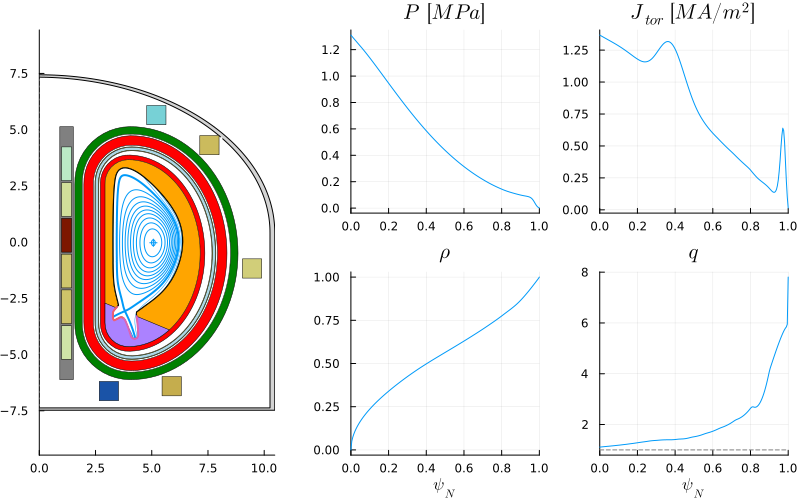

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start    R_end      material      area       volume     
     │ String  String                String    Float64    Float64    Float64    String        Float64    Float64    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      0.912009    0.0        0.912009                10.26        29.3964
   2 │ in                            oh        0.598428    0.912009   1.51044   ReBCO          6.73222     51.2345
   3 │ in                                      0.0689205   1.51044    1.57936                  0.775345     7.52618
   4 │ hfs                           tf        0.332733    1.57936    1.91209   ReBCO          9.77783    117.471
   5 │ hfs                                     0.0689205   1.91209    1.98101                  2.6345      91.2127
   6 │ hfs     low temp              shield    0.424191    

​


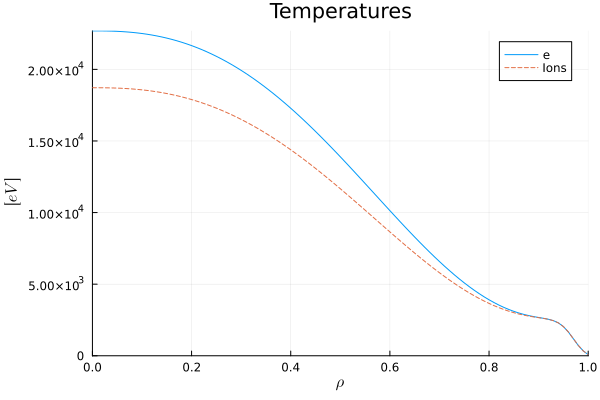

​


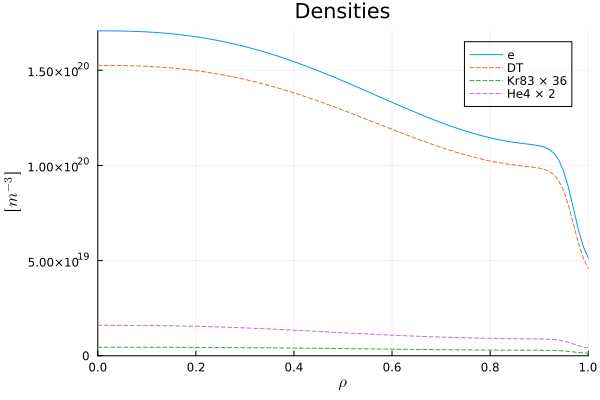

​


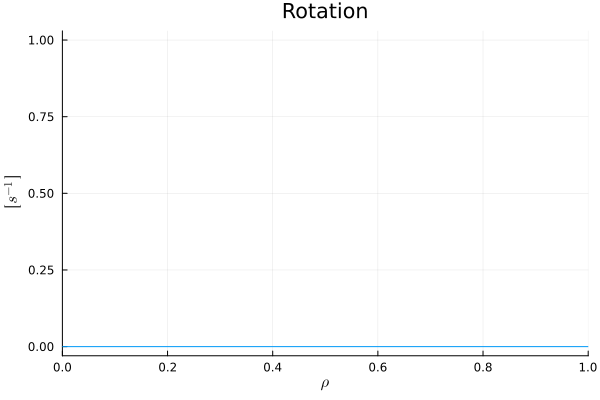

​


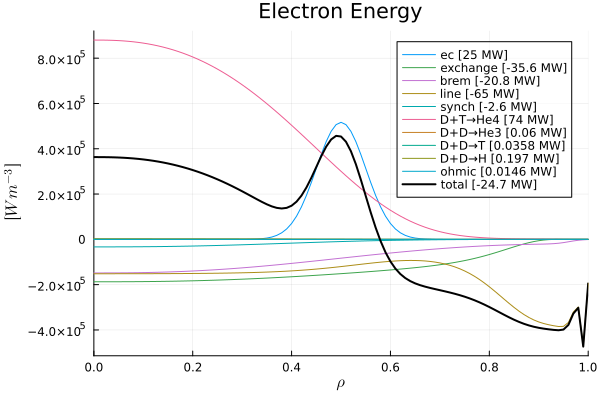

​


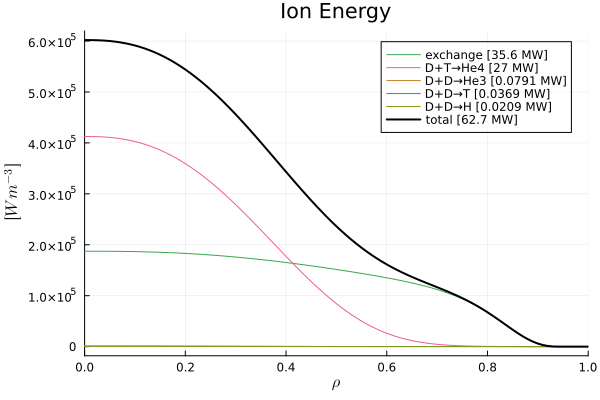

​


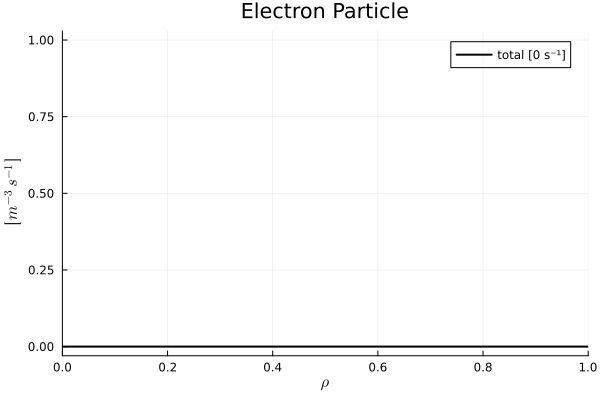

​


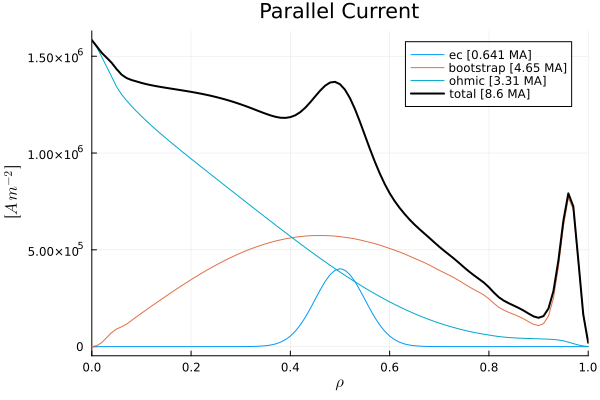

​


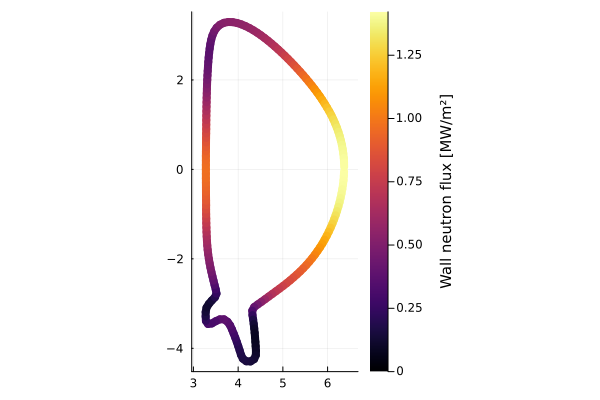

​


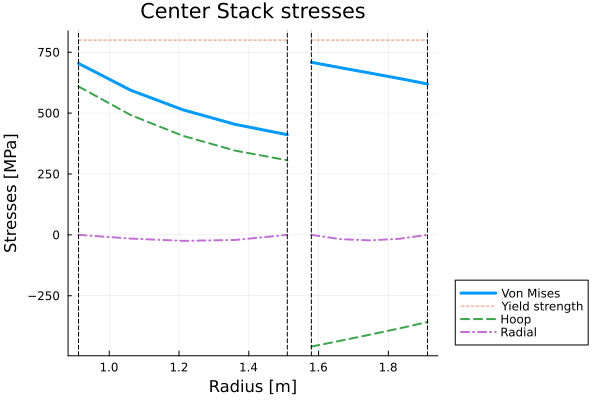

​


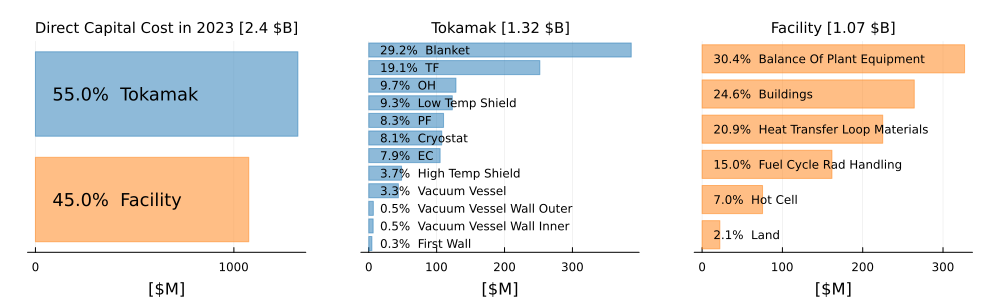

In [8]:
FUSE.digest(dd)

In [9]:
savedir = "/home/weisbergd/julia_dev/FUSE/playground/weisberg_FPP_build/FPP_build_Solovev/"
FUSE.save(savedir,dd,ini,act)

"/home/weisbergd/julia_dev/FUSE/playground/weisberg_FPP_build/FPP_build_Solovev/"